##Preparation

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Importing

In [175]:
lung_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Internship/Unified/lung_cancer/Lung Cancer/dataset_med.csv')
lung_data.info()
lung_data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
398083,398084,38.0,Male,Latvia,2023-07-07,Stage IV,No,Never Smoked,42.7,268,1,1,0,0,Chemotherapy,2025-04-29,0
272523,272524,64.0,Female,Netherlands,2021-12-23,Stage III,Yes,Former Smoker,36.9,283,1,1,1,0,Radiation,2022-12-28,0
543906,543907,65.0,Female,Netherlands,2022-11-11,Stage III,Yes,Former Smoker,21.1,238,1,0,0,0,Radiation,2024-03-02,1


In [176]:
lung_data['survived'].value_counts()

,count
survived,
0,693996
1,196004


In [177]:
lung_data._get_numeric_data().columns

Index(['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived'],
      dtype='object')

In [178]:
lung_data.select_dtypes(['category', 'object']).columns

Index(['gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history',
       'smoking_status', 'treatment_type', 'end_treatment_date'],
      dtype='object')

##Data Preprocessing

In [179]:
lung_data[['diagnosis_date', 'end_treatment_date']]

,diagnosis_date,end_treatment_date
0,2016-04-05,2017-09-10
1,2023-04-20,2024-06-17
2,2023-04-05,2024-04-09
3,2016-02-05,2017-04-23
4,2023-11-29,2025-01-08
...,...,...
889995,2022-07-01,2023-02-23
889996,2015-09-27,2017-06-19
889997,2016-03-27,2017-01-23
889998,2015-12-22,2017-12-12


In [180]:
lung_data['start_date'] = pd.to_datetime(lung_data['diagnosis_date'])
lung_data['end_date'] = pd.to_datetime(lung_data['end_treatment_date'])
lung_data['duration_day'] = np.abs((lung_data['start_date'] - lung_data['end_date']).dt.days)
lung_data['duration_day'].sample(3)

,duration_day
404561,277
658724,191
844285,502


In [181]:
lung_data['smoking_status'].value_counts()

,count
smoking_status,
Passive Smoker,223170
Never Smoked,222751
Former Smoker,222181
Current Smoker,221898


In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#gender_encoder (Male = 1, Female = 0)
gender_mapping = {"Male":1, "Female":0}
lung_data['gender_encoded'] = lung_data['gender'].map(gender_mapping)

#cancer_stage (I = 1, II = 2, so on)
stage_mapping = {"Stage I":1, "Stage II":2, "Stage III":3, "Stage IV":4}
lung_data['cancer_stage_encoded'] = lung_data['cancer_stage'].map(stage_mapping)
lung_data['cancer_stage_encoded']

#family_history using label encoder (Yes = 1, No = 0)
lung_data['family_history_encoded'] = le.fit_transform(lung_data['family_history'])
lung_data['family_history_encoded']

#smoking_status (Never = 0, Passive = 1, Current = 2, Former = 3)
status_mapping = {"Never Smoked":0, "Passive Smoker":1, "Current Smoker":2, "Former Smoker":3}
lung_data['smoking_status_encoded'] = lung_data['smoking_status'].map(status_mapping)

#treatment_type (Chemotherapy = 0, Surgery = 1, Combined = 2, Radiation = 3)
treat_mapping = {"Chemotherapy":0, "Surgery":1, "Combined":2, "Radiation":3}
lung_data['treatment_type_encoded'] = lung_data['treatment_type'].map(treat_mapping)

#cleaned_dataset (remove categorical data)
lung_dataset = lung_data.drop(['gender', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'diagnosis_date', 'end_treatment_date'], axis = 1)

lung_dataset.info()
lung_dataset.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      890000 non-null  int64         
 1   age                     890000 non-null  float64       
 2   country                 890000 non-null  object        
 3   bmi                     890000 non-null  float64       
 4   cholesterol_level       890000 non-null  int64         
 5   hypertension            890000 non-null  int64         
 6   asthma                  890000 non-null  int64         
 7   cirrhosis               890000 non-null  int64         
 8   other_cancer            890000 non-null  int64         
 9   survived                890000 non-null  int64         
 10  start_date              890000 non-null  datetime64[ns]
 11  end_date                890000 non-null  datetime64[ns]
 12  duration_day            890000

,id,age,country,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,start_date,end_date,duration_day,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
884829,884830,68.0,Hungary,42.7,265,0,0,0,0,0,2023-03-31,2024-06-20,447,0,3,1,0,0
653354,653355,57.0,Slovenia,43.1,276,1,0,0,0,0,2015-04-16,2016-07-04,445,0,3,0,3,2
879206,879207,41.0,Slovakia,16.1,162,1,0,1,0,0,2020-08-23,2022-01-30,525,0,2,0,2,0
440300,440301,37.0,Hungary,30.0,164,1,1,0,0,0,2021-12-07,2022-12-08,366,0,3,1,1,3
349147,349148,62.0,Denmark,39.1,252,1,0,1,0,0,2018-11-21,2020-11-11,721,1,2,1,1,3
858221,858222,45.0,Netherlands,35.1,257,0,1,0,0,0,2022-10-30,2023-11-15,381,1,2,1,1,0
587417,587418,57.0,Slovakia,35.8,290,1,1,0,0,0,2020-10-27,2021-05-13,198,1,4,0,0,3
384312,384313,54.0,Finland,44.6,271,1,1,0,0,0,2019-02-20,2020-03-04,378,1,4,0,1,2
618231,618232,50.0,Lithuania,25.5,219,0,1,0,0,0,2020-08-24,2021-07-01,311,0,3,1,3,2
332624,332625,61.0,Malta,20.5,156,1,1,1,0,0,2022-11-09,2024-01-14,431,1,1,0,0,0


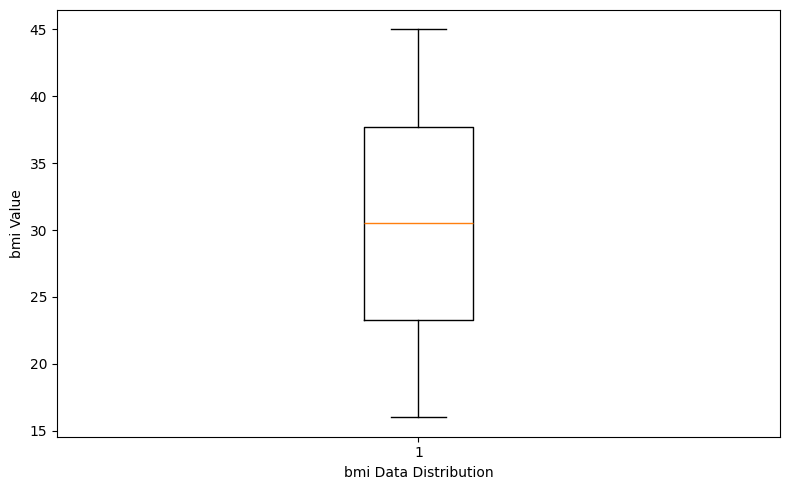

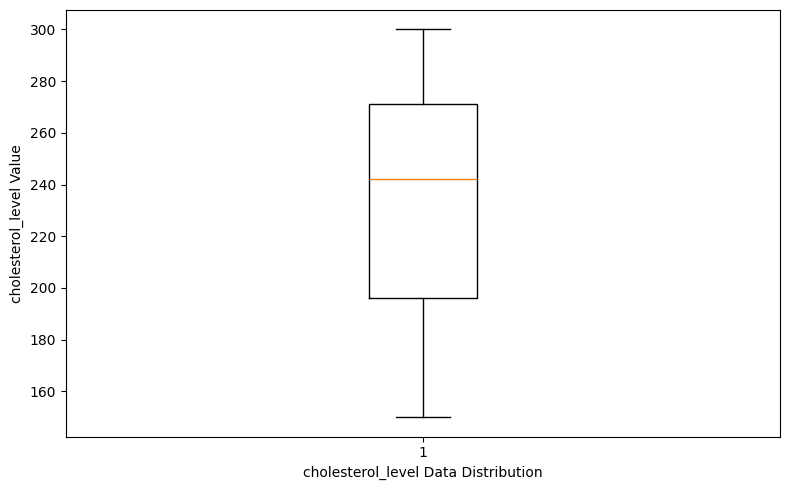

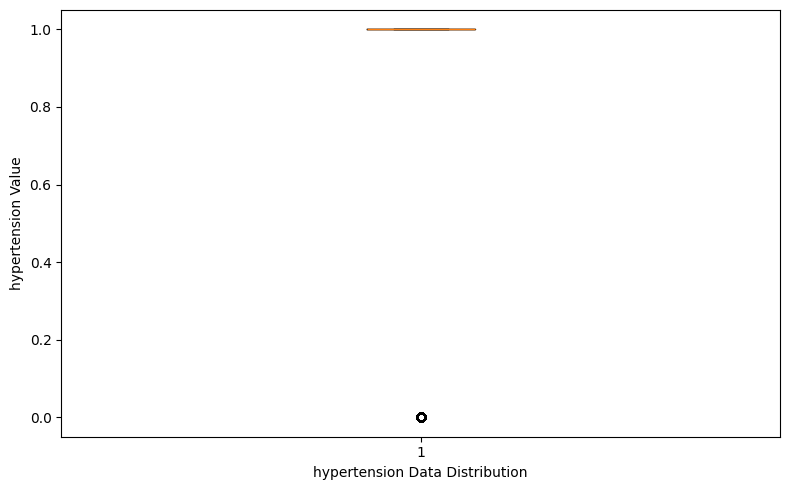

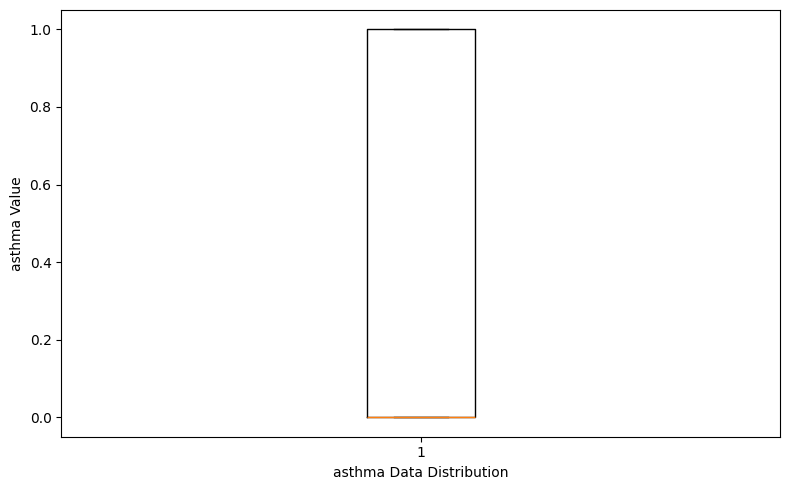

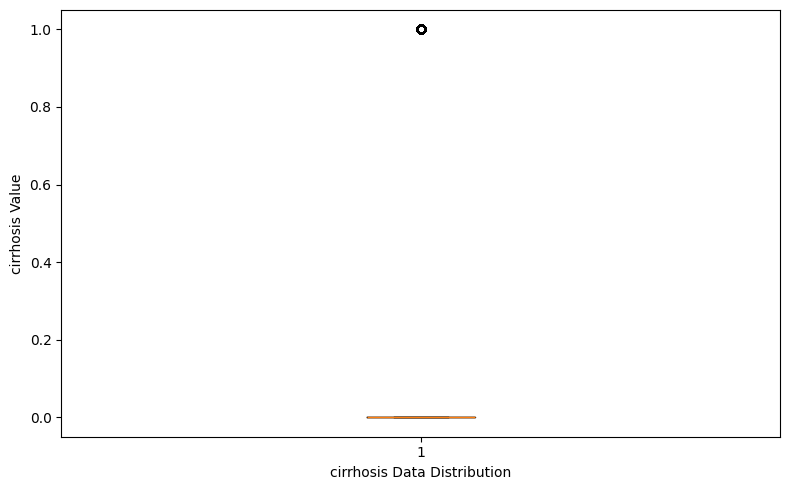

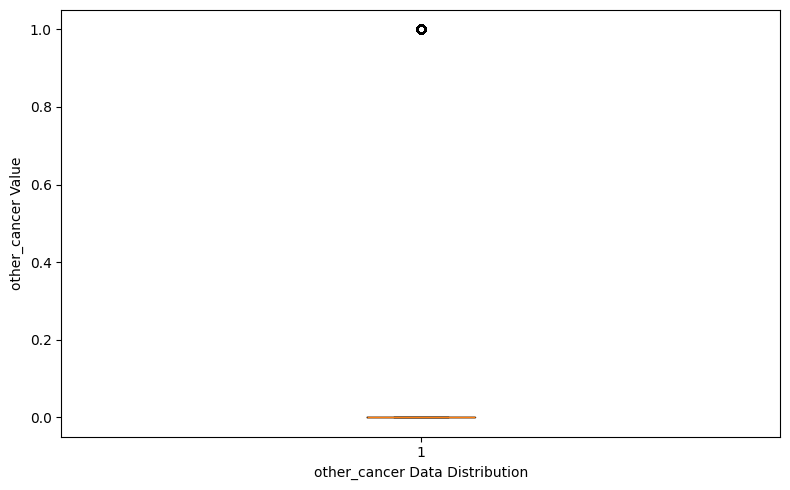

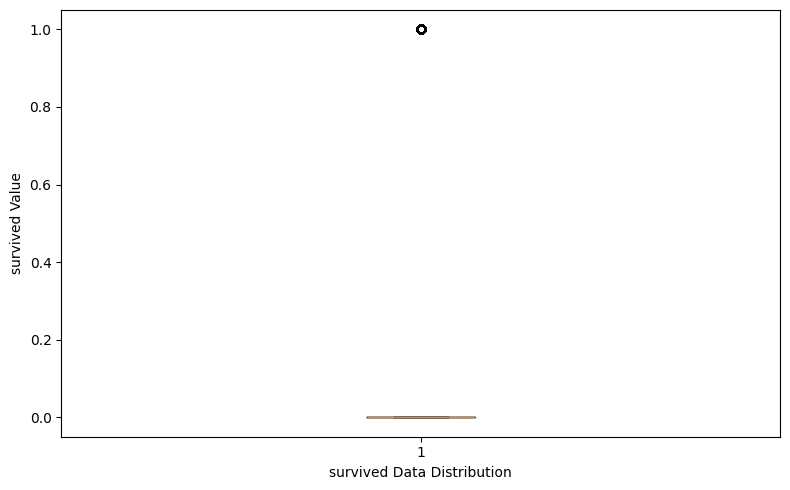

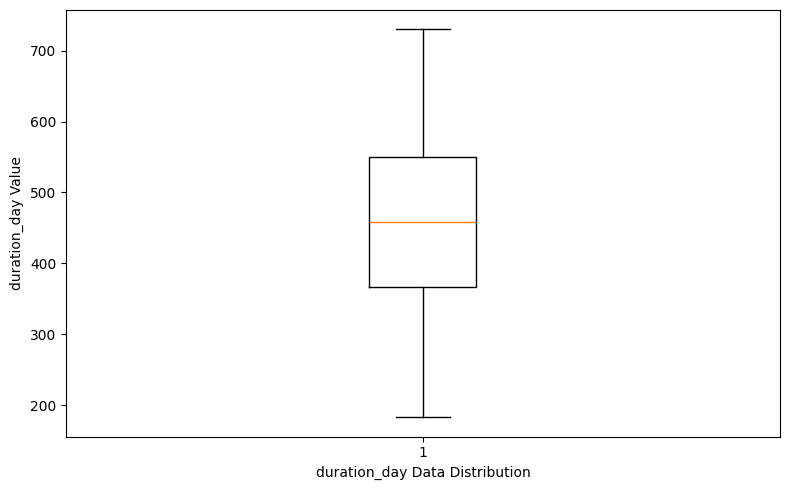

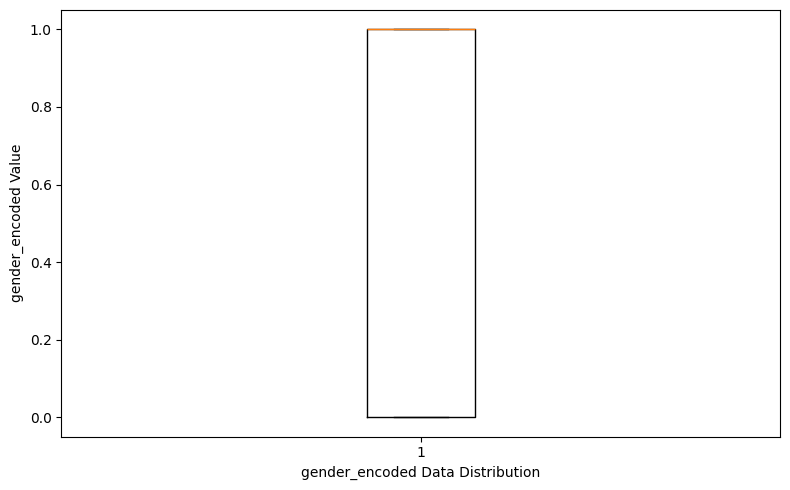

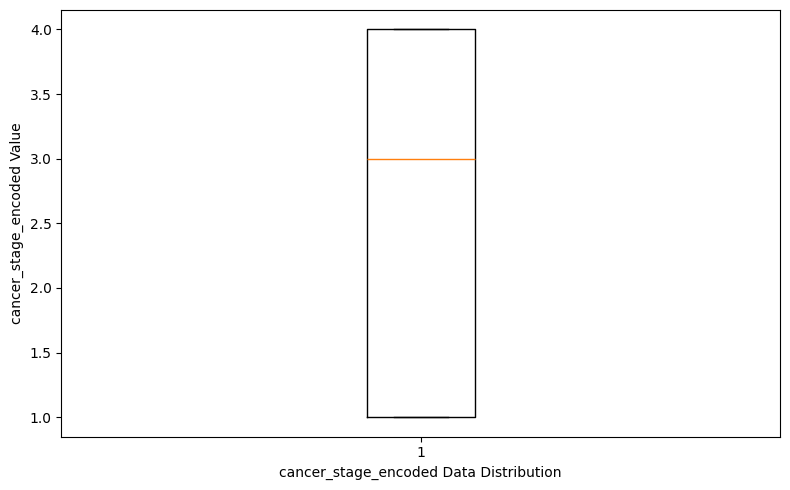

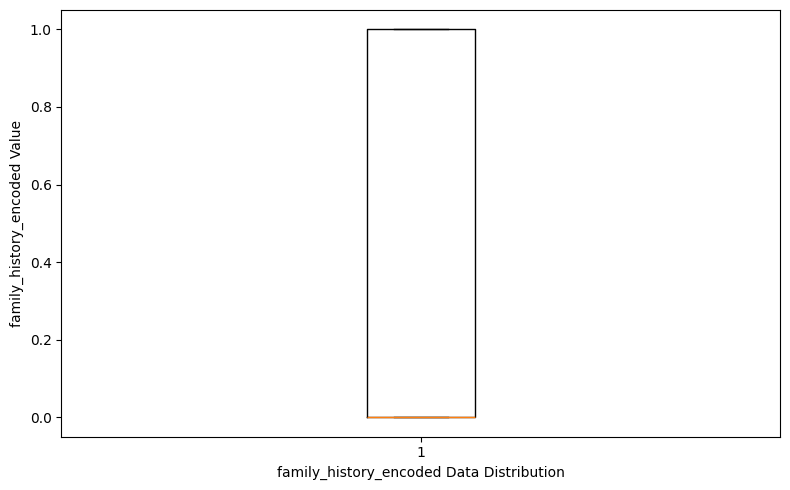

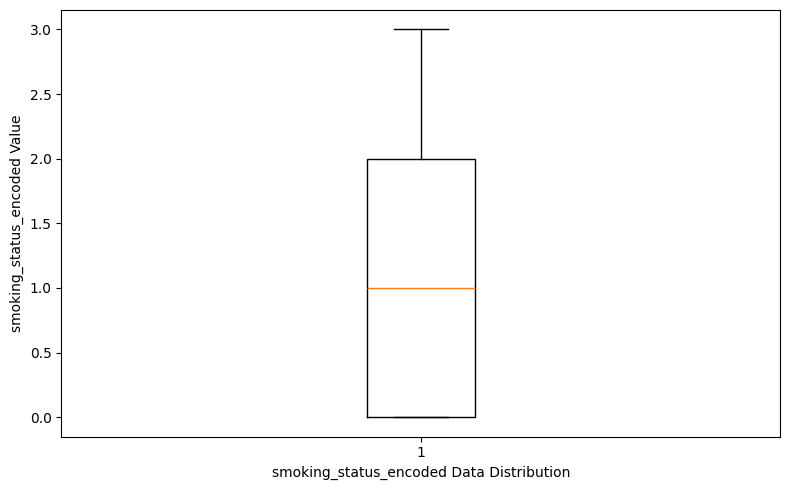

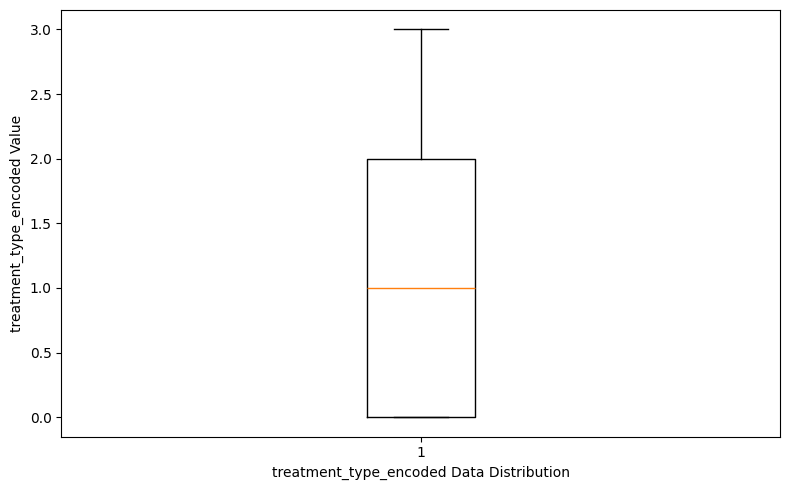

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
lung_dataset._get_numeric_data().columns
#Drop id and age
numeric_columns = [
       'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived', 'duration_day',
       'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded',
       'smoking_status_encoded', 'treatment_type_encoded'
]
for i in numeric_columns:
  plt.figure(figsize=(8,5))
  plt.boxplot(lung_dataset[i])
  plt.xlabel(f'{i} Data Distribution')
  plt.ylabel(f"{i} Value")
  plt.tight_layout()
  plt.show()

In [184]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = lung_dataset.drop(['id','age','country', 'survived', 'start_date', 'end_date'], axis=1)
y = lung_dataset['survived']
X.columns.value_counts().sum()
X.columns

Index(['bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'duration_day', 'gender_encoded',
       'cancer_stage_encoded', 'family_history_encoded',
       'smoking_status_encoded', 'treatment_type_encoded'],
      dtype='object')

In [185]:
X.sample(3)

,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,duration_day,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
800736,36.9,274,0,0,0,0,293,0,3,0,0,0
82540,37.3,267,1,0,0,1,406,1,3,1,3,0
123370,32.8,282,1,0,0,0,701,1,1,1,1,1


In [186]:
inspect = X.drop(['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded'], axis = 1)
inspect.sample(3)

,bmi,cholesterol_level,duration_day
741866,40.7,257,718
184922,39.7,274,598
655466,18.7,235,687


In [187]:
minmax.fit(X.drop(['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded'], axis = 1))
X_scaled_raw = minmax.transform(X.drop(['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded'], axis = 1))
X_scaled = pd.DataFrame(X_scaled_raw) #bmi = 0, cholesterol_level = 1, duration_day = 2
X_half_set = pd.concat([X_scaled, X[['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded']]], axis = 1)
X_half_set.sample(3)

,0,1,2,hypertension,asthma,cirrhosis,other_cancer,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
756495,0.341379,0.346667,0.702011,1,1,1,0,0,1,0,0,2
862859,0.213793,0.373333,1.000000,1,1,0,0,1,2,0,2,3
43495,0.786207,0.946667,0.219378,1,0,0,0,1,2,0,2,3


In [150]:
'''
minmax.fit(X)
X_scaled_raw = minmax.transform(X)
X_half_set = pd.DataFrame(X_scaled_raw) #bmi = 0, cholesterol_level = 1, duration_day = 2
#X_half_set = pd.concat([X_scaled, X[['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded']]], axis = 1)
X_half_set.sample(3)
'''

,0,1,2,3,4,5,6,7,8,9,10,11
250825,0.017241,0.206667,0.0,0.0,0.0,0.0,0.517367,0.0,0.666667,0.0,0.000000,0.333333
885881,0.858621,0.820000,1.0,0.0,0.0,1.0,0.449726,1.0,0.333333,0.0,0.666667,0.333333
496876,0.206897,0.120000,1.0,1.0,0.0,0.0,0.714808,0.0,0.000000,1.0,1.000000,0.333333


##Data for Model

In [188]:
X_set = X_half_set.set_axis([
    'bmi', 'cholesterol_level', 'duration_day','hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded',
    'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded'], axis='columns')
X_set.sample(3)
X_set_clipped = X_set.sample(frac=4, replace=True).reset_index(drop=True)[:30000]
X_set_clipped.head(3)

,bmi,cholesterol_level,duration_day,hypertension,asthma,cirrhosis,other_cancer,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
0,0.968966,0.660000,0.636197,1,0,0,0,0,2,0,3,0
1,0.286207,0.100000,0.447898,0,0,1,0,0,4,0,3,2
2,0.503448,0.973333,0.568556,0,1,1,0,1,2,0,3,0


In [189]:
y_clipped = y.sample(frac=4, replace=True).reset_index(drop=True)[:30000]
y_clipped.value_counts()

,count
survived,
0,23520
1,6480


##Model Preparation

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_set_clipped, y_clipped, test_size=0.4, random_state=42)

In [191]:
X_train.head(3)

,bmi,cholesterol_level,duration_day,hypertension,asthma,cirrhosis,other_cancer,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
2758,0.689655,0.873333,0.191956,1,1,0,0,0,4,1,1,2
11337,0.662069,0.933333,0.707495,1,1,0,0,1,1,0,1,3
23149,0.006897,0.026667,0.844607,1,0,0,0,0,2,1,2,0


In [192]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
# Initialize and train the SVC classifier
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svc))

# Evaluate the classifier
print("SVC Classifier Report:\n", classification_report(y_test, y_pred_svc))

Accuracy Score:
 0.785
SVC Classifier Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      9420
           1       0.00      0.00      0.00      2580

    accuracy                           0.79     12000
   macro avg       0.39      0.50      0.44     12000
weighted avg       0.62      0.79      0.69     12000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


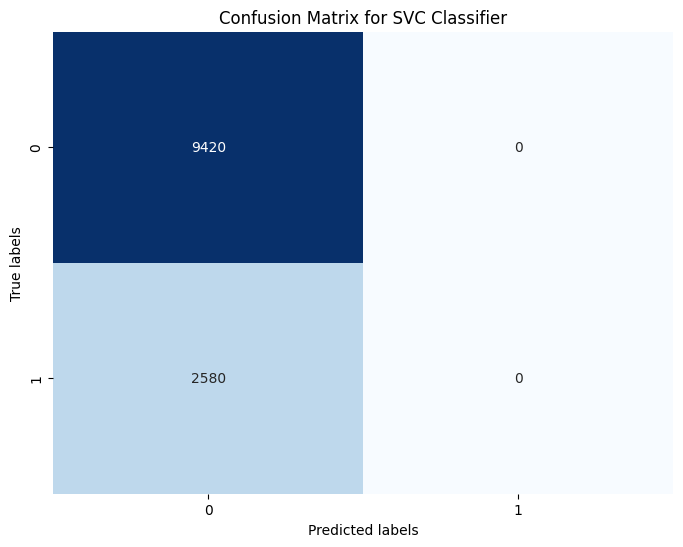

In [193]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

In [194]:
X_set_clipped.columns

Index(['bmi', 'cholesterol_level', 'duration_day', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded',
       'family_history_encoded', 'smoking_status_encoded',
       'treatment_type_encoded'],
      dtype='object')

In [195]:
X_set_clipped.sample(3)

,bmi,cholesterol_level,duration_day,hypertension,asthma,cirrhosis,other_cancer,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
25322,0.996552,0.626667,0.659963,1,1,0,0,1,4,0,1,0
9548,0.162069,0.186667,0.888483,1,1,1,1,1,3,0,0,2
20027,0.796552,0.906667,0.054845,1,1,0,0,1,3,1,3,2


In [196]:
y_clipped.sample(3)

,survived
13139,0
14009,0
98,0


In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Param
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

print("Training model")
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training model

Model Evaluation:
Accuracy: 0.785

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      9420
           1       0.00      0.00      0.00      2580

    accuracy                           0.79     12000
   macro avg       0.39      0.50      0.44     12000
weighted avg       0.62      0.79      0.69     12000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


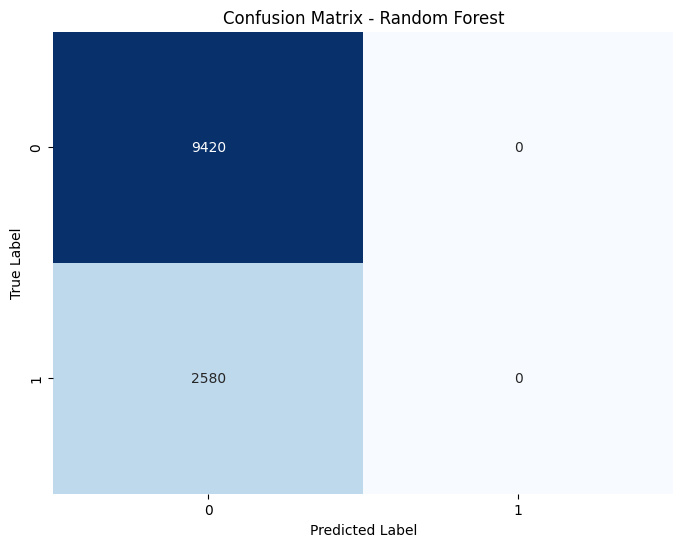

In [198]:
# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [199]:
col = X_train.columns
col

Index(['bmi', 'cholesterol_level', 'duration_day', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded',
       'family_history_encoded', 'smoking_status_encoded',
       'treatment_type_encoded'],
      dtype='object')

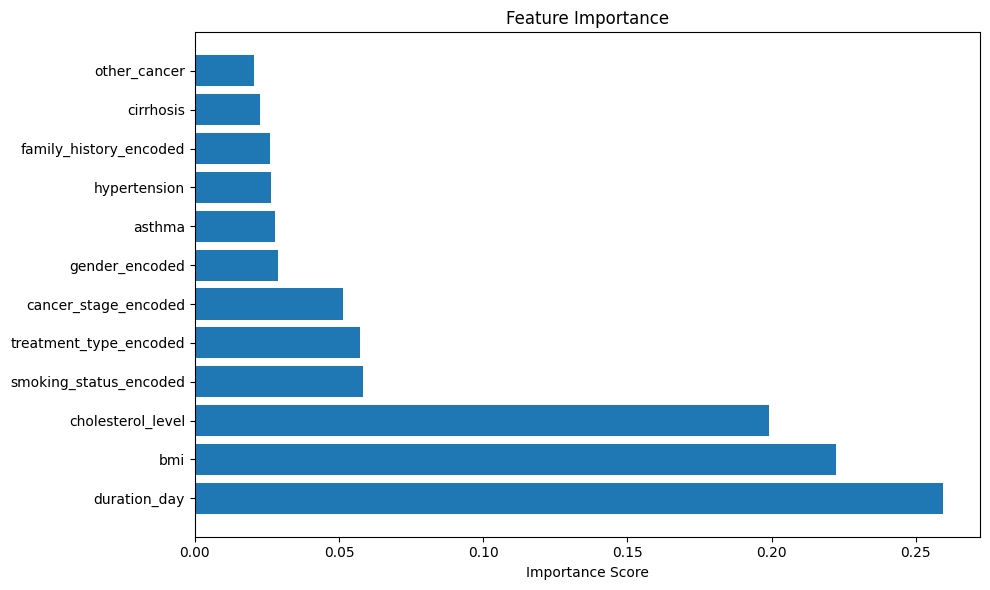

In [200]:
feature_names = ['bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
                  'other_cancer', 'duration_day', 'gender_encoded',
                  'cancer_stage_encoded', 'family_history_encoded',
                  'smoking_status_encoded', 'treatment_type_encoded']

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()